# Лабораторная работа №3. Линейная регрессия

Для начала подключим все необходимые библиотеки

In [1]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

%matplotlib inline

Загрузим данные и сбросим неинформативные признаки

In [2]:
#импорт данных и сброс данных типа object
data = pd.read_csv('D:\clients.csv', sep=',')
data=data.drop(['month', 'product_type', 'region', 'phone_operator'], axis='columns')

def gender_oppression(gender):
    if gender == 'male':
        return 1
    return 0

data['sex'] = data['sex'].apply(gender_oppression)

def rename(edu):
    if edu == 'Incomplete secondary education':
        return 0
    if edu == 'Secondary education':
        return 1
    if edu == 'Secondary special education':
        return 2
    if edu == 'Incomplete higher education':
        return 3
    if edu == 'Higher education':
        return 4
    if edu == 'PhD Degree':
        return 5
    return 6

data['education'] = data['education'].apply(rename)

def rename(fs):
    if fs == 'Another':
        return 0
    if fs == 'Unmarried':
        return 1
    if fs == 'Married':
        return 2
    return 3

data['family_status'] = data['family_status'].apply(rename)
data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723 entries, 0 to 1722
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   credit_amount        1723 non-null   int64
 1   credit_term          1723 non-null   int64
 2   age                  1723 non-null   int64
 3   sex                  1723 non-null   int64
 4   education            1723 non-null   int64
 5   having_children_flg  1723 non-null   int64
 6   income               1723 non-null   int64
 7   family_status        1723 non-null   int64
 8   is_client            1723 non-null   int64
 9   bad_client_target    1723 non-null   int64
dtypes: int64(10)
memory usage: 134.7 KB


,credit_amount,credit_term,age,sex,education,having_children_flg,income,family_status,is_client,bad_client_target
0,7000,12,39,1,2,0,21000,0,0,0
1,19000,6,20,1,2,1,17000,0,1,0
2,29000,12,23,0,2,0,31000,0,0,0
3,10000,12,30,1,2,1,31000,1,1,0
4,14500,12,25,0,4,0,26000,2,1,0


In [12]:
data

,credit_amount,credit_term,age,sex,education,having_children_flg,income,family_status,is_client,bad_client_target
0,7000,12,39,1,2,0,1,0,0,0
1,19000,6,20,1,2,1,1,0,1,0
2,29000,12,23,0,2,0,1,0,0,0
3,10000,12,30,1,2,1,1,1,1,0
4,14500,12,25,0,4,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...
1718,18500,6,32,1,4,1,1,0,1,0
1719,6500,6,24,1,2,0,1,0,1,0
1720,5500,12,21,1,3,0,1,0,1,0
1721,30500,10,25,0,3,0,1,0,1,1


In [7]:
counts = data['income']
for i in range(len(counts)):
     if counts[i] < 12000:
       counts[i] = 0
     else:
       counts[i] = 1
print(counts)

0       1
1       1
2       1
3       1
4       1
       ..
1718    1
1719    1
1720    1
1721    1
1722    1
Name: income, Length: 1723, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


Настало время тренировки 

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = data[data.columns[:-1]]
y = data['bad_client_target']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

Хорошо, мы натренировали модель, но хорошо ли мы натренировали модель? Проведём регуляризацию!

L2 регуляризация

In [15]:
from sklearn.linear_model import Ridge

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
ridge = Ridge(alpha=0.1)
ridge.fit(X2_train, y2_train)
y2_train_pred = ridge.predict(X2_train)
y2_test_pred = ridge.predict(X2_test)
print('Веса признаков:')
print(ridge.coef_)

Веса признаков:
[-4.02815792e-07  5.70799564e-03 -2.20986189e-03 -3.84277937e-02
 -3.88598269e-02 -2.22484726e-02  2.72932765e-02  1.70343163e-02
  5.17006491e-02]


Проверим ещё раз, теперь с помощью L1 регуляризации

In [16]:
from sklearn.linear_model import Lasso

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
lasso = Lasso(alpha=0.1)
lasso.fit(X1_train, y1_train)
y1_train_pred = lasso.predict(X1_train)
y1_test_pred = lasso.predict(X1_test)
print('Веса признаков:')
print(lasso.coef_)

Веса признаков:
[-3.63279910e-07  2.50124834e-03 -1.95021057e-03 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00]


Значащими признаками тут являются только столбцы credit_amount, credit_term, age

Хорошо, мы провели регуляризацию, но хорошо ли мы провели регуляризацию? Попробуем посмотреть значения весов при других альфа.

<ipython-input-17-64aecb0c0fed>:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X1_train, y1_train)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59.297260302765636, tolerance: 0.012528026533996678
  model = cd_fast.enet_coordinate_descent(


for alpha= [0]  lasso: [-4.02856162e-07  5.70813566e-03 -2.20955651e-03 -3.84392500e-02
 -3.88627210e-02 -2.22536214e-02  2.73776743e-02  1.70361212e-02
  5.17176401e-02]
for alpha= [0]  ridge: [-4.02856162e-07  5.70813566e-03 -2.20955651e-03 -3.84392500e-02
 -3.88627210e-02 -2.22536214e-02  2.73776743e-02  1.70361212e-02
  5.17176401e-02]
for alpha= [1]  lasso: [-3.63279910e-07  2.50124834e-03 -1.95021057e-03 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00]
for alpha= [1]  ridge: [-4.02467328e-07  5.70677294e-03 -2.21255763e-03 -3.83247918e-02
 -3.88340817e-02 -2.22021155e-02  2.65564702e-02  1.70179742e-02
  5.15482638e-02]
for alpha= [2]  lasso: [-1.11218445e-07  0.00000000e+00 -1.36895031e-03 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00]
for alpha= [2]  ridge: [-4.02109708e-07  5.70548867e-03 -2.21544782e-03 -3.82105947e-02
 -3.88060736e-02 -2.21505856e-02  2.57830728e-02  1.69996

for alpha= [36]  lasso: [-1.93746177e-07  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00]
for alpha= [36]  ridge: [-3.98759180e-07  5.68367691e-03 -2.28036752e-03 -3.46086621e-02
 -3.80213774e-02 -2.04617242e-02  1.29423978e-02  1.63378115e-02
  4.62715722e-02]
for alpha= [37]  lasso: [-1.93607113e-07  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00]
for alpha= [37]  ridge: [-3.98785585e-07  5.68333856e-03 -2.28175034e-03 -3.45120239e-02
 -3.80004412e-02 -2.04148386e-02  1.27549601e-02  1.63183254e-02
  4.61371434e-02]
for alpha= [38]  lasso: [-1.9346805e-07  0.0000000e+00 -0.0000000e+00 -0.0000000e+00
 -0.0000000e+00 -0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00]
for alpha= [38]  ridge: [-3.98815486e-07  5.68300837e-03 -2.28311570e-03 -3.44159117e-02
 -3.79795554e-02 -2.03681302e-02  1.25728297e-02  1.62988658

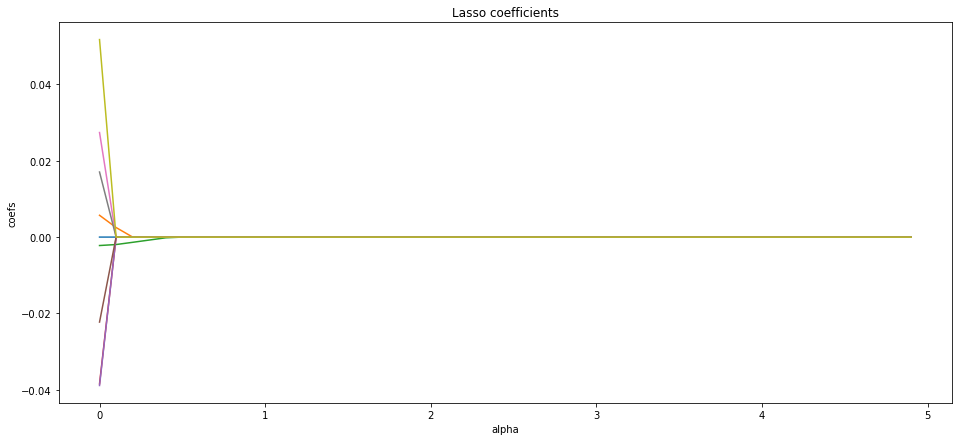

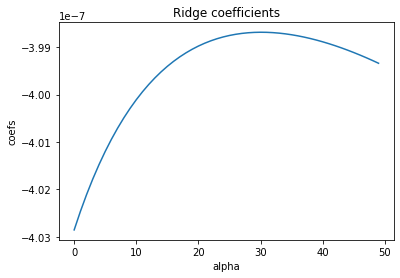

In [17]:
import matplotlib.pyplot as plt
coefsLasso = []
coefsRidge = []

alphasLasso = np.arange (0, 5, 0.1)
alphasRidge = np.arange (0, 50, 1)
for i in range(50):
    lasso = Lasso(alpha=alphasLasso[i])
    lasso.fit(X1_train, y1_train)
    coefsLasso.append(lasso.coef_)
    ridge = Ridge(alpha=alphasRidge[i])
    ridge.fit(X2_train, y2_train)
    coefsRidge.append(ridge.coef_[0])
    print('for alpha=', [i], ' lasso:', lasso.coef_)
    print('for alpha=', [i], ' ridge:', ridge.coef_)
    

plt.figure(figsize = (16,7))

plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')
plt.show()

plt.plot(alphasRidge, coefsRidge)
plt.title('Ridge coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')
plt.show()

plt.show()

Не нужно быть великим дата-сатанистом чтобы понять, что использованное ранее значение alpha=0.1 - отличный выбор. Уже при alpha=0.2 модель начинает чрезмерно упрощаться. Остаётся только посмотреть что будет если взять альфу менее 0.1, например alpha=0.001

In [18]:
from sklearn.linear_model import Lasso

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
lasso = Lasso(alpha=0.001)
lasso.fit(X1_train, y1_train)
y1_train_pred = lasso.predict(X1_train)
y1_test_pred = lasso.predict(X1_test)
print('Веса признаков:')
print(lasso.coef_)

Веса признаков:
[-3.86486300e-07  5.63216326e-03 -2.31400096e-03 -3.48712108e-02
 -3.78958518e-02 -1.87517755e-02  0.00000000e+00  1.57401251e-02
  4.80161517e-02]


In [19]:
from sklearn.linear_model import Ridge

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
ridge = Ridge(alpha=0.001)
ridge.fit(X2_train, y2_train)
y2_train_pred = ridge.predict(X2_train)
y2_test_pred = ridge.predict(X2_test)
print('Веса признаков:')
print(ridge.coef_)

Веса признаков:
[-4.02855757e-07  5.70813425e-03 -2.20955957e-03 -3.84391355e-02
 -3.88626920e-02 -2.22535699e-02  2.73768277e-02  1.70361031e-02
  5.17174701e-02]


L1 теперь не зануляет то, что считалось ненужным, хотя занулился параметр family_status в L2. С другой стороны, стоило ли оно того? При таком маленьком значении альфа мы, можно сказать, и не проводили регуляризацию, а значит наша модель осталась весьма уязвима к переобучению. Настало время компромисса - берём alpha=0.01!

In [20]:
from sklearn.linear_model import Lasso

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
lasso = Lasso(alpha=0.01)
lasso.fit(X1_train, y1_train)
y1_train_pred = lasso.predict(X1_train)
y1_test_pred = lasso.predict(X1_test)
print('Веса признаков:')
print(lasso.coef_)

Веса признаков:
[-4.11670859e-07  5.35453214e-03 -2.62462666e-03 -0.00000000e+00
 -3.25615401e-02 -0.00000000e+00  0.00000000e+00  2.68992504e-03
  1.36670524e-02]


In [21]:
from sklearn.linear_model import Ridge

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
ridge = Ridge(alpha=0.01)
ridge.fit(X2_train, y2_train)
y2_train_pred = ridge.predict(X2_train)
y2_test_pred = ridge.predict(X2_test)
print('Веса признаков:')
print(ridge.coef_)

Веса признаков:
[-4.02852110e-07  5.70812162e-03 -2.20958711e-03 -3.84381043e-02
 -3.88624312e-02 -2.22531065e-02  2.73692111e-02  1.70359408e-02
  5.17159404e-02]


Вывод: линейная регрессия - сила! Мало того, что она даёт хорошую точность предсказания, так она ещё и позволяет провести отбор признаков при помощи L1 и L2 регуляризаций. Благодаря им нам удалось отделить значащие признаки от незначащих и снизить риск переобучения модели, а при помощи подбора коэффициента альфа мы смогли найти компромисс между излишним упрощением модели и переобучением.